# **Peramalan Penjualan Pakaian Dengan Metode ARIMA Sebagai Bentuk Pengembangan Toko Di Masa Depan**

**Kelompok 3 (RB)**
1. Arfyani Deiastuti (120450006)
2. Ribka Gabriela Siburian (120450108)
3. Nawa Fatimi Fauziah (120450014)
4. Sophia Yolanda RI (120450008)
5. Anung Nugroho (120450052)

# **Mengeksplor Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import data dari url yang ada menjadi df 
url = 'https://drive.google.com/file/d/1ifNzXFLisqlJO6R1BiRI8Y3XJQdA28jL/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)       # mendefinisikan variabel df yaitu dengan fungsi read() untuk membaca file dari Data
dl = pd.DataFrame(df)     # mendefinisikan variabel data dari df dengan fungsi dataframe() 
dl.head()                 # Memanggil data dari data teratas

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729,1257.763541,30024676
1,01.02.2015,1.580759e+07,11636,1358.507000,30024676
2,01.03.2015,2.204715e+07,15922,1384.697024,30024676
3,01.04.2015,1.881458e+07,15227,1235.606705,30024676
4,01.05.2015,1.402148e+07,8620,1626.621765,30024676


In [6]:
dl.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [7]:
dl['Period'].astype('datetime64[ns]')

0    2015-01-01
1    2015-01-02
2    2015-01-03
3    2015-01-04
4    2015-01-05
        ...    
59   2019-01-12
60   2020-01-01
61   2020-01-02
62   2020-01-03
63   2020-01-04
Name: Period, Length: 64, dtype: datetime64[ns]

In [8]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    64 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     int64  
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 2.6+ KB


In [9]:
dl['Period'] = pd.to_datetime(dl['Period'],format='%d.%m.%Y')

In [10]:
dl['year'] = dl['Period'].dt.year 
dl['month'] = dl['Period'].dt.month 
dl['day'] = dl['Period'].dt.day

dl['dayofweek_num'] = dl['Period'].dt.dayofweek  
dl.head(11)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,year,month,day,dayofweek_num
0,2015-01-01,1.601007e+07,12729,1257.763541,30024676,2015,1,1,3
1,2015-02-01,1.580759e+07,11636,1358.507000,30024676,2015,2,1,6
2,2015-03-01,2.204715e+07,15922,1384.697024,30024676,2015,3,1,6
3,2015-04-01,1.881458e+07,15227,1235.606705,30024676,2015,4,1,2
4,2015-05-01,1.402148e+07,8620,1626.621765,30024676,2015,5,1,4
5,2015-06-01,1.678393e+07,13160,1275.374508,30024676,2015,6,1,0
6,2015-07-01,1.916189e+07,17254,1110.576805,30024676,2015,7,1,2
7,2015-08-01,1.520498e+07,8642,1759.428870,30024676,2015,8,1,5
8,2015-09-01,2.060394e+07,16144,1276.259909,30024676,2015,9,1,1
9,2015-10-01,2.099287e+07,18135,1157.588904,30024676,2015,10,1,3


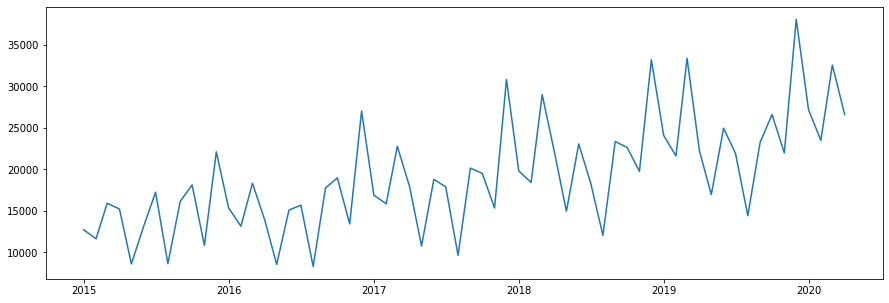

In [60]:
plt.rcParams.update({'figure.figsize':(15,5)})
plt.plot(dl.Sales_quantity)

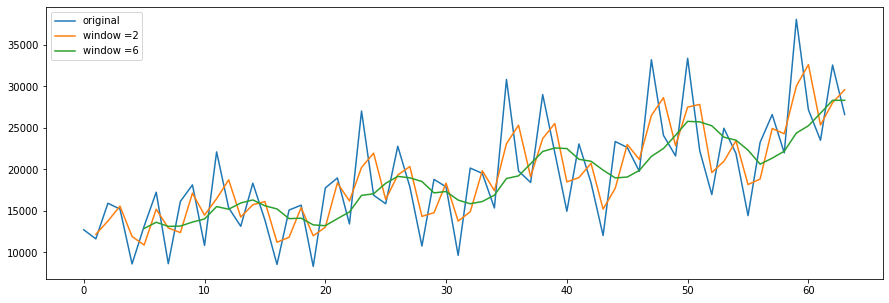

In [14]:
dl['rolling_mean'] = dl.Sales_quantity.rolling( window=2).mean()
dl['rolling_mean6'] = dl.Sales_quantity.rolling( window=6).mean()
plt.plot(dl.Sales_quantity, label='original')
plt.plot(dl.rolling_mean, label = 'window =2')
plt.plot(dl.rolling_mean6, label = 'window =6')
plt.legend(loc='best')

In [15]:
dl.head(11)

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,year,month,day,dayofweek_num,rolling_mean,rolling_mean6
0,2015-01-01,1.601007e+07,12729,1257.763541,30024676,2015,1,1,3,NaN,NaN
1,2015-02-01,1.580759e+07,11636,1358.507000,30024676,2015,2,1,6,12182.5,NaN
2,2015-03-01,2.204715e+07,15922,1384.697024,30024676,2015,3,1,6,13779.0,NaN
3,2015-04-01,1.881458e+07,15227,1235.606705,30024676,2015,4,1,2,15574.5,NaN
4,2015-05-01,1.402148e+07,8620,1626.621765,30024676,2015,5,1,4,11923.5,NaN
5,2015-06-01,1.678393e+07,13160,1275.374508,30024676,2015,6,1,0,10890.0,12882.333333
6,2015-07-01,1.916189e+07,17254,1110.576805,30024676,2015,7,1,2,15207.0,13636.500000
7,2015-08-01,1.520498e+07,8642,1759.428870,30024676,2015,8,1,5,12948.0,13137.500000
8,2015-09-01,2.060394e+07,16144,1276.259909,30024676,2015,9,1,1,12393.0,13174.500000
9,2015-10-01,2.099287e+07,18135,1157.588904,30024676,2015,10,1,3,17139.5,13659.166667


In [16]:
dl.index = dl.Period

# **ADF (Augmented Dickey Fuller) Test**

In [17]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(dl.Sales_quantity, autolag='AIC')
dftest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(1.1570562060945393,
 0.9956753282590142,
 11,
 52,
 {'1%': -3.562878534649522,
  '10%': -2.597393446745562,
  '5%': -2.918973284023669},
 936.0262923313308)

In [18]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                  1.157056
p-value                         0.995675
#Lags Used                     11.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


# **Differencing Data**

In [19]:
dl.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region,year,month,day,dayofweek_num,rolling_mean,rolling_mean6
Period,,,,,,,,,,,
2015-01-01,2015-01-01,1.601007e+07,12729,1257.763541,30024676,2015,1,1,3,NaN,NaN
2015-02-01,2015-02-01,1.580759e+07,11636,1358.507000,30024676,2015,2,1,6,12182.5,NaN
2015-03-01,2015-03-01,2.204715e+07,15922,1384.697024,30024676,2015,3,1,6,13779.0,NaN
2015-04-01,2015-04-01,1.881458e+07,15227,1235.606705,30024676,2015,4,1,2,15574.5,NaN
2015-05-01,2015-05-01,1.402148e+07,8620,1626.621765,30024676,2015,5,1,4,11923.5,NaN


**To remove Trend**

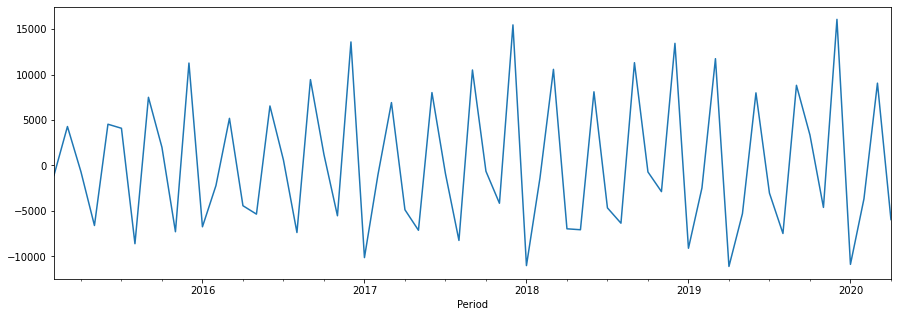

In [20]:
# menghilangkan trend
dl_1 = dl['Sales_quantity'] - dl['Sales_quantity'].shift(1)
dl_1.dropna(inplace=True)
dl_1.dropna().plot()

In [21]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(dl_1, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = np.round(value, 1)
print (dfoutput)

dftest[1].round(4)

Test Statistic                -9.023001e+00
p-value                        5.708171e-15
#Lags Used                     1.000000e+01
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.600000e+00
Critical Value (5%)           -2.900000e+00
Critical Value (10%)          -2.600000e+00
dtype: float64


0.0

**To remove Seasonality**

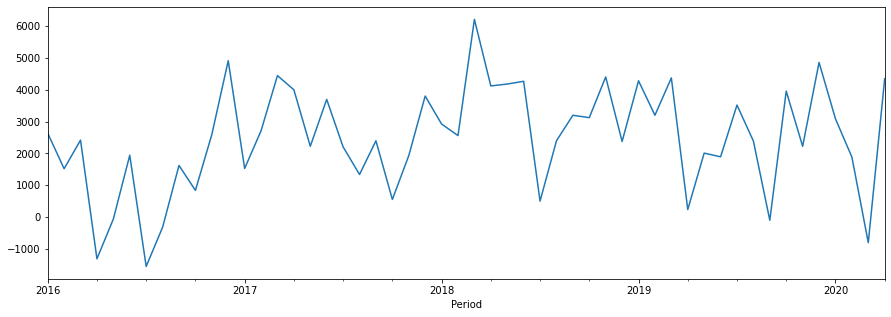

In [22]:
# mengilangkan musiman
dl_2 = dl['Sales_quantity'] - dl['Sales_quantity'].shift(12)
dl_2.dropna(inplace=True)
dl_2.dropna().plot()

In [23]:
dftest = adfuller(dl_2, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                 -2.565385
p-value                         0.100365
#Lags Used                      8.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


**Log Transformation**

In [24]:
dl_log = np.log(dl.Sales_quantity)

In [25]:
dftest = adfuller(dl_log, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                  0.389590
p-value                         0.981101
#Lags Used                     11.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


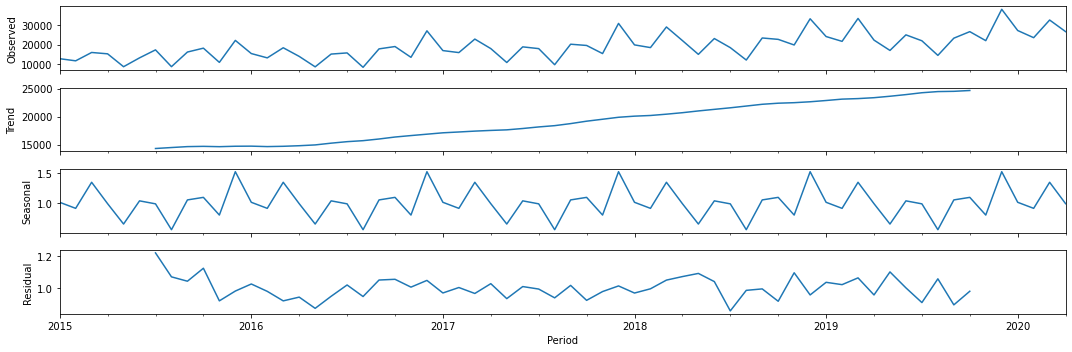

In [26]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(dl.Sales_quantity, freq=12, model="multiplicative")
fig = res.plot()
fig.show()

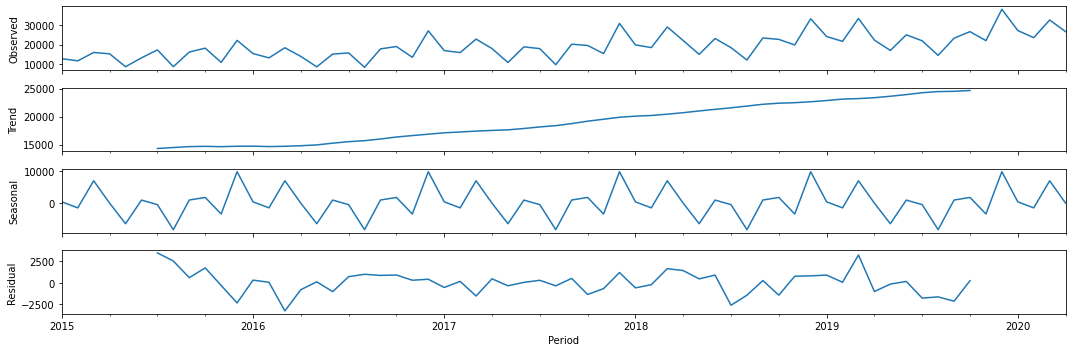

In [27]:
res = sm.tsa.seasonal_decompose(dl.Sales_quantity, freq=12, model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
fig.show()

# **AR PACF 'P' value**

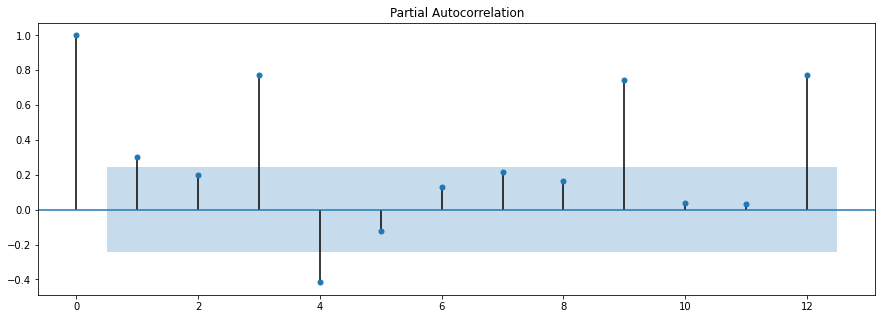

In [28]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(dl_log, lags=12, method='ols')
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Partial Autocorrelation Function')

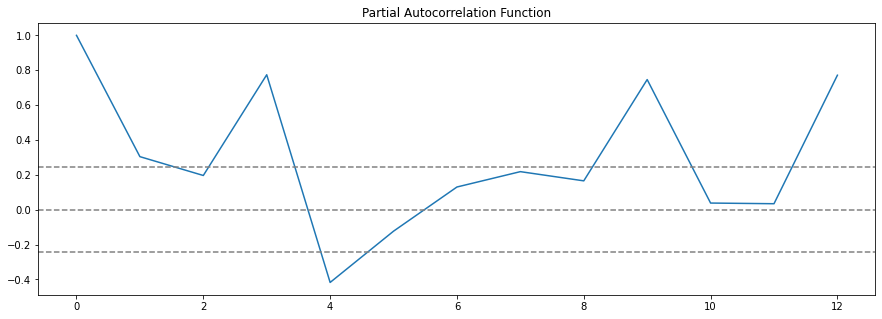

In [29]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(dl_log, nlags=12)
lag_pacf = pacf(dl_log, nlags=12, method='ols')


plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dl_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dl_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

p – Nilai lag di mana grafik PACF melintasi interval kepercayaan atas untuk pertama kalinya. Jika diperhatikan dengan seksama, dalam hal ini maka p=2.

# **MA ACF 'Q' value**

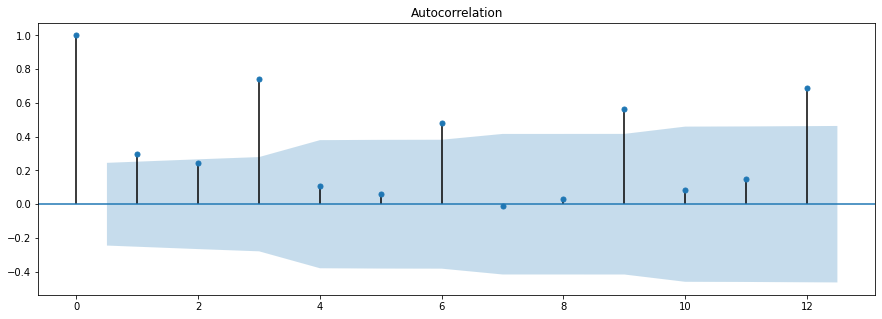

In [30]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(dl_log, lags=12)
plt.show()

Text(0.5, 1.0, 'Autocorrelation Function')

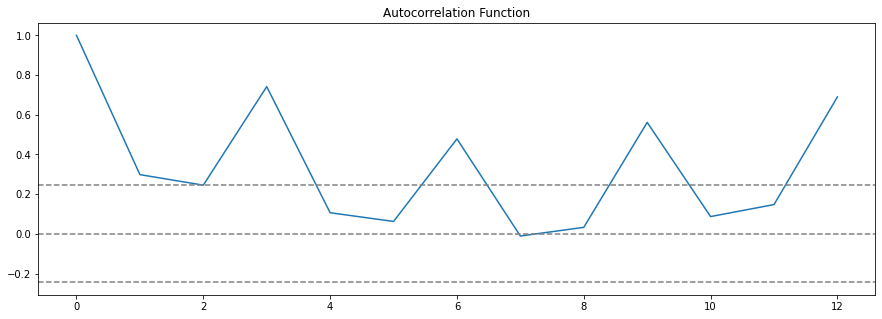

In [31]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dl_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dl_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

q – Nilai lag di mana grafik ACF melintasi interval kepercayaan atas untuk pertama kalinya. Jika diperhatikan dengan seksama, dalam hal ini maka q=2.

# **Penerapan Model ARIMA**

In [32]:
from statsmodels.tsa.arima_model import ARIMA

**Menggunakan Model ARIMA (2,1,2)**

In [33]:
model = ARIMA(dl_log, order=(2,1,2))  
results_AR = model.fit(disp=1) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [34]:
results_AR.fittedvalues

Period
2015-02-01    0.012561
2015-03-01    0.057779
2015-04-01   -0.141232
2015-05-01   -0.105574
2015-06-01    0.404312
                ...   
2019-12-01    0.516769
2020-01-01   -0.174985
2020-02-01   -0.266722
2020-03-01    0.456733
2020-04-01   -0.129993
Length: 63, dtype: float64

In [35]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff.head()
(predictions_ARIMA_diff)

Period
2015-02-01    0.012561
2015-03-01    0.057779
2015-04-01   -0.141232
2015-05-01   -0.105574
2015-06-01    0.404312
                ...   
2019-12-01    0.516769
2020-01-01   -0.174985
2020-02-01   -0.266722
2020-03-01    0.456733
2020-04-01   -0.129993
Length: 63, dtype: float64

In [36]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()
(predictions_ARIMA_diff_cumsum)

Period
2015-02-01    0.012561
2015-03-01    0.070340
2015-04-01   -0.070892
2015-05-01   -0.176466
2015-06-01    0.227845
                ...   
2019-12-01    0.908573
2020-01-01    0.733587
2020-02-01    0.466865
2020-03-01    0.923598
2020-04-01    0.793605
Length: 63, dtype: float64

In [37]:
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head(49)

Period
2015-01-01     9.451638
2015-02-01     9.464199
2015-03-01     9.521978
2015-04-01     9.380746
2015-05-01     9.275172
2015-06-01     9.679483
2015-07-01     9.573557
2015-08-01     9.196235
2015-09-01     9.711790
2015-10-01     9.647963
2015-11-01     9.163305
2015-12-01     9.724669
2016-01-01     9.646165
2016-02-01     9.254270
2016-03-01     9.739555
2016-04-01     9.686015
2016-05-01     9.371032
2016-06-01     9.845662
2016-07-01     9.717651
2016-08-01     9.361579
2016-09-01     9.934050
2016-10-01     9.734451
2016-11-01     9.323822
2016-12-01     9.933008
2017-01-01     9.742105
2017-02-01     9.424677
2017-03-01     9.931866
2017-04-01     9.792633
2017-05-01     9.498910
2017-06-01    10.024147
2017-07-01     9.833503
2017-08-01     9.506572
2017-09-01    10.118007
2017-10-01     9.855614
2017-11-01     9.490629
2017-12-01    10.114263
2018-01-01     9.867393
2018-02-01     9.572512
2018-03-01    10.110295
2018-04-01     9.910763
2018-05-01     9.634461
2018-06-0

Text(0.5, 1.0, 'RMSE: 3289.1181')

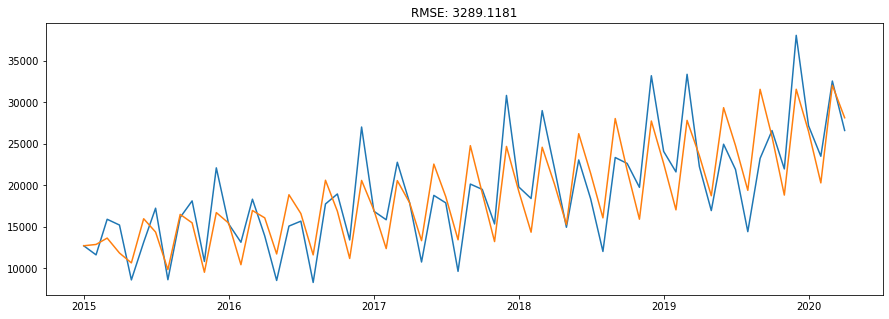

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))

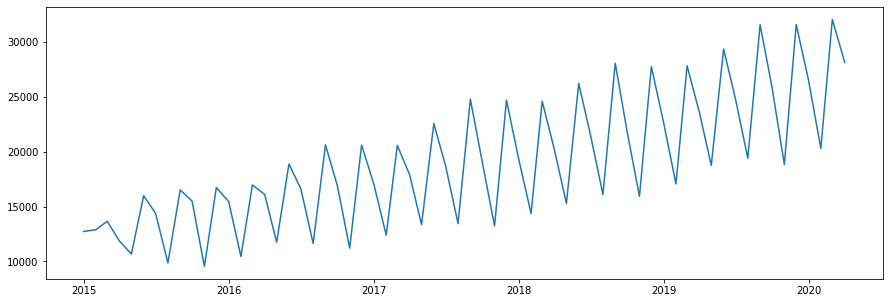

In [39]:

plt.plot(predictions_ARIMA)

In [40]:
predictions_ARIMA.describe()

count       64.000000
mean     18975.101497
std       5913.981344
min       9540.540215
25%      14375.714791
50%      18274.771716
75%      22867.824761
max      32055.887237
dtype: float64

In [41]:
x = results_AR.forecast(steps=10)
x = np.exp(x[0])
x

array([20271.05627022, 31437.86159461, 27567.7269088 , 21115.98522877,
       32623.41204711, 28555.82189075, 21995.59357489, 33853.01291399,
       29580.62725671, 22911.28098479])

In [42]:
rng = pd.date_range('2020-04-01', periods=10, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng

,Dates
0,2020-04-30
1,2020-05-31
2,2020-06-30
3,2020-07-31
4,2020-08-31
5,2020-09-30
6,2020-10-31
7,2020-11-30
8,2020-12-31
9,2021-01-31


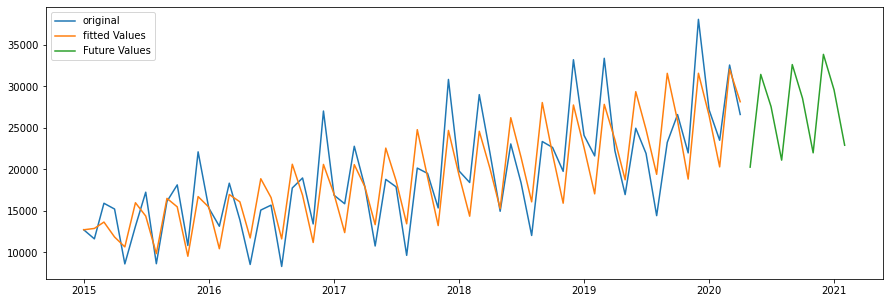

In [43]:
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

**Model ARIMA (2,1,1)**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


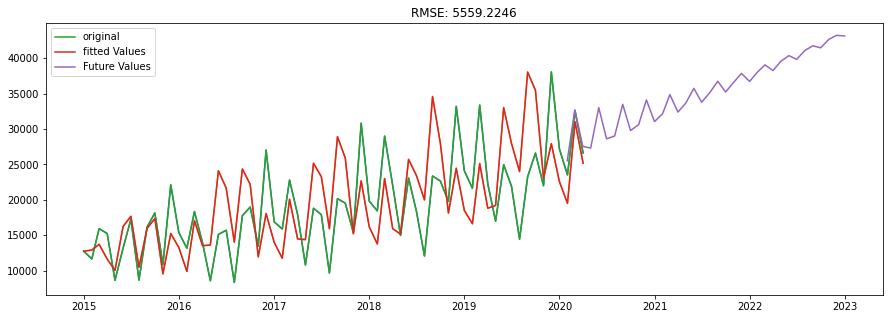

In [44]:
model = ARIMA(dl_log, order=(2,1,1))  
results_AR = model.fit(disp=1)
results_AR.fittedvalues
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))
x = results_AR.forecast(steps=36)
x = np.exp(x[0])
x
rng = pd.date_range('2020-01-01', periods=36, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

In [45]:
predictions_ARIMA

Period
2015-01-01    12729.000000
2015-02-01    12888.110259
2015-03-01    13702.754764
2015-04-01    11621.005318
2015-05-01    10011.867965
                  ...     
2019-12-01    27935.099194
2020-01-01    22562.972123
2020-02-01    19492.560793
2020-03-01    31013.429745
2020-04-01    25166.449520
Length: 64, dtype: float64

In [46]:
rng['future']

Dates
2020-01-31    25509.189878
2020-02-29    32708.044878
2020-03-31    27542.029666
2020-04-30    27313.343384
2020-05-31    33018.591126
2020-06-30    28609.485216
2020-07-31    29008.474456
2020-08-31    33489.894590
2020-09-30    29786.648310
2020-10-31    30616.271389
2020-11-30    34110.121262
2020-12-31    31051.078037
2021-01-31    32159.045556
2021-02-28    34867.559702
2021-03-31    32386.584972
2021-04-30    33658.111589
2021-05-31    35751.267338
2021-06-30    33781.807953
2021-07-31    35132.885461
2021-08-31    36751.388479
2021-09-30    35229.154480
2021-10-31    36600.490338
2021-11-30    37859.284997
2021-12-31    36723.976383
2022-01-31    38075.693362
2022-02-28    39067.561645
2022-03-31    38263.911153
2022-04-30    39571.039511
2022-05-31    40370.032986
2022-06-30    39848.349728
2022-07-31    41097.088779
2022-08-31    41761.658722
2022-09-30    41478.006748
2022-10-31    42662.695128
2022-11-30    43238.462760
2022-12-31    43154.576649
Name: future, dtype: f

**Model ARIMA (2,1,2)**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


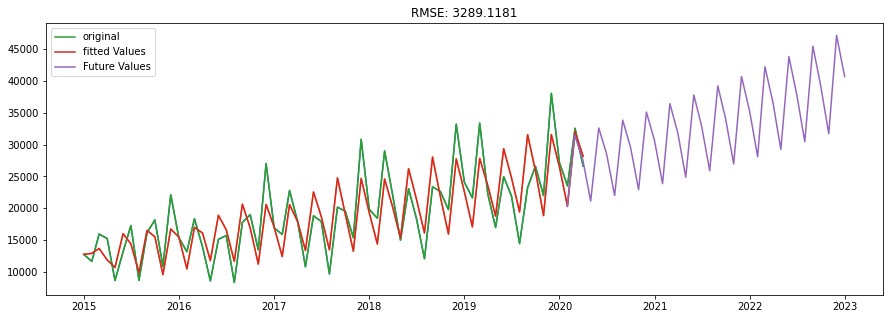

In [47]:
model = ARIMA(dl_log, order=(2,1,2))  
results_AR = model.fit(disp=1)
results_AR.fittedvalues
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))
x = results_AR.forecast(steps=36)
x = np.exp(x[0])
rng = pd.date_range('2020-01-01', periods=36, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

In [48]:
predictions_ARIMA

Period
2015-01-01    12729.000000
2015-02-01    12889.892682
2015-03-01    13656.597763
2015-04-01    11857.857610
2015-05-01    10669.791217
                  ...     
2019-12-01    31577.833909
2020-01-01    26508.621730
2020-02-01    20302.587282
2020-03-01    32055.887237
2020-04-01    28148.313660
Length: 64, dtype: float64

In [49]:
y = rng['future']
y

Dates
2020-01-31    20271.056270
2020-02-29    31437.861595
2020-03-31    27567.726909
2020-04-30    21115.985229
2020-05-31    32623.412047
2020-06-30    28555.821891
2020-07-31    21995.593575
2020-08-31    33853.012914
2020-09-30    29580.627257
2020-10-31    22911.280985
2020-11-30    35128.294249
2020-12-31    30643.536945
2021-01-31    23864.502721
2021-02-28    36450.946622
2021-03-31    31745.998521
2021-04-30    24856.771808
2021-05-31    37822.723379
2021-06-30    32889.515258
2021-07-31    25889.661295
2021-08-31    39245.442991
2021-09-30    34075.648292
2021-10-31    26964.806604
2021-11-30    40720.991484
2021-12-31    35306.018868
2022-01-31    28083.907970
2022-02-28    42251.324973
2022-03-31    36582.310669
2022-04-30    29248.732974
2022-05-31    43838.472277
2022-06-30    37906.272237
2022-07-31    30461.119177
2022-08-31    45484.537642
2022-09-30    39279.719486
2022-10-31    31722.976851
2022-11-30    47191.703565
2022-12-31    40704.538317
Name: future, dtype: f

In [50]:
y.describe()

count       36.000000
mean     32729.801496
std       7007.733255
min      20271.056270
25%      27954.862705
50%      32184.705284
75%      37843.610594
max      47191.703565
Name: future, dtype: float64

**Model ARIMA (2,2,2)**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


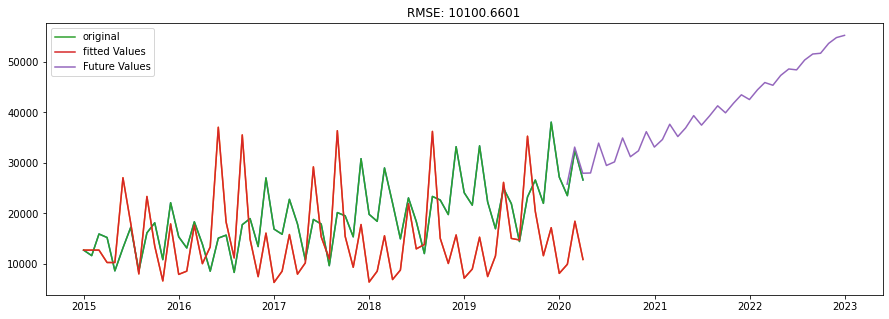

In [51]:
model = ARIMA(dl_log, order=(2,2,2))  
results_AR = model.fit(disp=1)
results_AR.fittedvalues
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))
x = results_AR.forecast(steps=36)
x = np.exp(x[0])
rng = pd.date_range('2020-01-01', periods=36, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

**Model ARIMA (1,2,1)**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


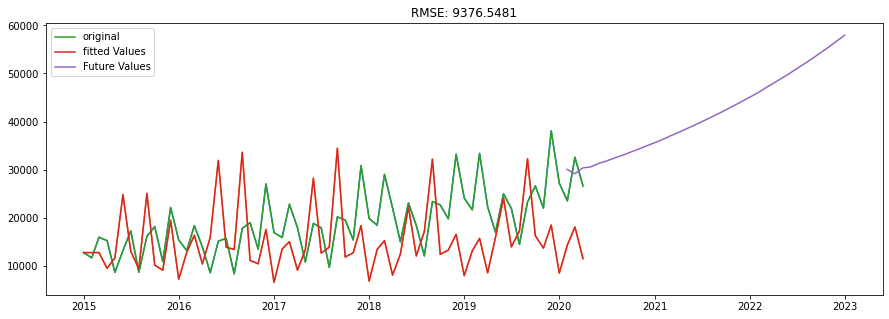

In [54]:
model = ARIMA(dl_log, order=(1,2,1))  
results_AR = model.fit(disp=1)
results_AR.fittedvalues
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))
x = results_AR.forecast(steps=36)
x = np.exp(x[0])
rng = pd.date_range('2020-01-01', periods=36, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


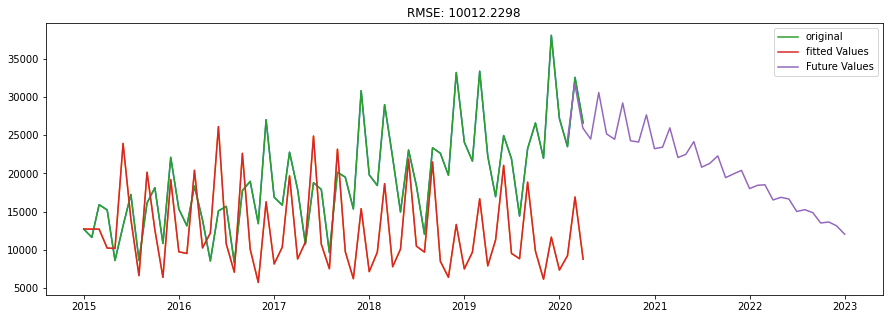

In [55]:
model = ARIMA(dl_log, order=(2,2,0))  
results_AR = model.fit(disp=1)
results_AR.fittedvalues
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))
x = results_AR.forecast(steps=36)
x = np.exp(x[0])
rng = pd.date_range('2020-01-01', periods=36, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


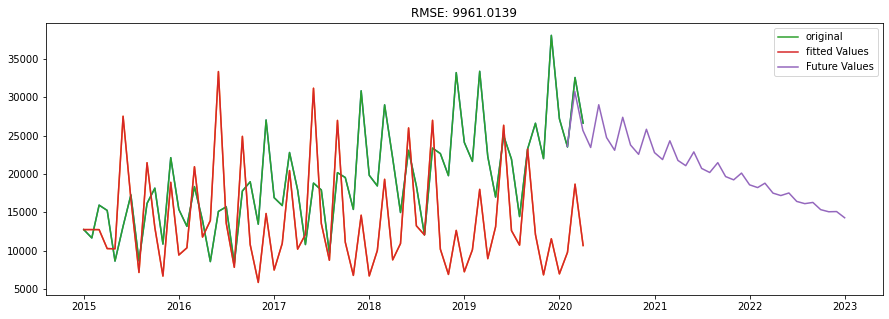

In [56]:
model = ARIMA(dl_log, order=(2,2,1))  
results_AR = model.fit(disp=1)
results_AR.fittedvalues
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))
x = results_AR.forecast(steps=36)
x = np.exp(x[0])
rng = pd.date_range('2020-01-01', periods=36, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


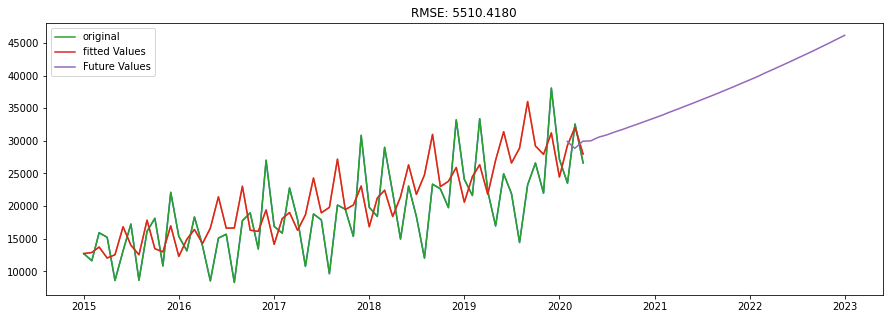

In [57]:
model = ARIMA(dl_log, order=(1,1,0))  
results_AR = model.fit(disp=1)
results_AR.fittedvalues
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))
x = results_AR.forecast(steps=36)
x = np.exp(x[0])
rng = pd.date_range('2020-01-01', periods=36, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


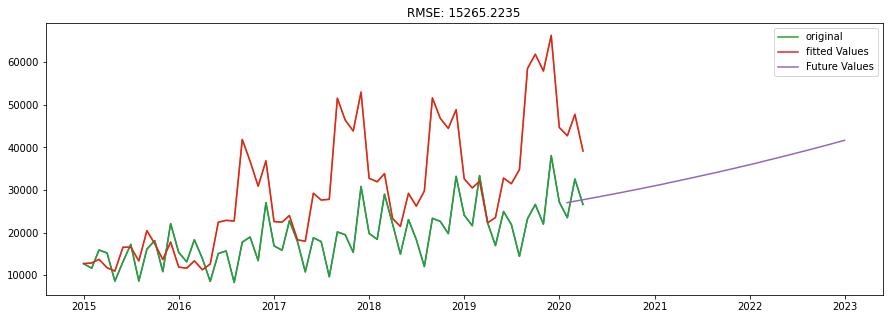

In [58]:
model = ARIMA(dl_log, order=(0,1,1))  
results_AR = model.fit(disp=1)
results_AR.fittedvalues
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))
x = results_AR.forecast(steps=36)
x = np.exp(x[0])
rng = pd.date_range('2020-01-01', periods=36, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


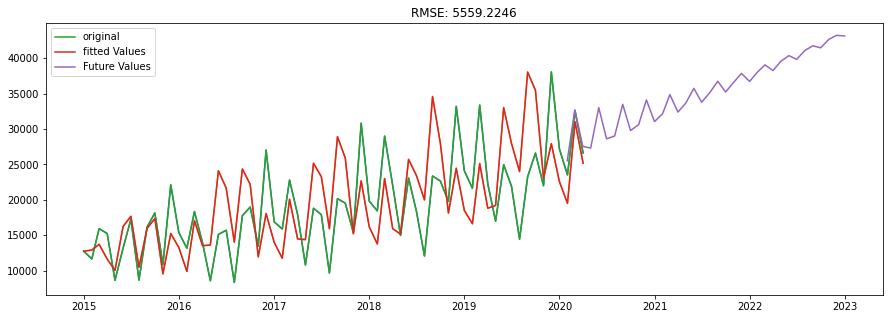

In [59]:
model = ARIMA(dl_log, order=(2,1,1))  
results_AR = model.fit(disp=1)
results_AR.fittedvalues
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(dl_log.iloc[0], index=dl.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(dl['Sales_quantity'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-dl['Sales_quantity'])**2)/len(dl['Sales_quantity'])))
x = results_AR.forecast(steps=36)
x = np.exp(x[0])
rng = pd.date_range('2020-01-01', periods=36, freq='M')
rng = pd.DataFrame(rng, columns=['Dates'])
rng['future'] = x
rng.index = rng.Dates
plt.plot(dl['Sales_quantity'], label='original')
plt.plot(predictions_ARIMA, label='fitted Values')
plt.plot(rng['future'], label='Future Values')
plt.legend(loc='best')

# **Uji Diagnostik**

In [104]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(dl_log, order =(2,1,2))
model = arima_model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:       D.Sales_quantity   No. Observations:                   63
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  18.854
Method:                       css-mle   S.D. of innovations              0.166
Date:                Sun, 29 May 2022   AIC                            -25.708
Time:                        18:17:00   BIC                            -12.849
Sample:                    02-01-2015   HQIC                           -20.651
                         - 04-01-2020                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0126      0.020      0.641      0.524      -0.026       0.051
ar.L1.D.Sales_quantity    -1.0012      0.012    -84.057      0.000      -1.025      -0.978
ar.L